In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [34]:
biens = pd.read_csv("table_bien.csv", sep=',', encoding = "utf-8",index_col=0)
localisation = pd.read_csv("table_localisation.csv", sep=',', encoding = "utf-8",index_col=0)
table_type = pd.read_csv("table_type.csv", sep=',', encoding = "utf-8",index_col=0)
paru_vendu_df = pd.read_csv("table_totale_paru_vendu.csv", sep=',', encoding = "utf-8",index_col=0)

In [35]:
paru_vendu_df

,lien,type de bien,nb de pièces,taille,carrez,prix,nom_ville,code_postal,nom_x,code_insee,code,nom_y,geometry,prix/m²
0,https://www.paruvendu.fr/immobilier/vente/appa...,Appartement,4,67,False,269000,Vaires-sur-Marne,77360,Vaires-sur-Marne,77479,77479,Vaires-sur-Marne,"POLYGON ((2.6608499853619 48.874040288642, 2.6...",4014.9
1,https://www.paruvendu.fr/immobilier/vente/mais...,Maison,4,91,False,420000,Palaiseau,91120,Palaiseau,91477,91477,Palaiseau,"POLYGON ((2.2034622767258 48.721045886051, 2.2...",4615.4
2,https://www.paruvendu.fr/immobilier/vente/appa...,Appartement,4,72,False,225000,Conflans-Sainte-Honorine,78700,Conflans-Sainte-Honorine,78172,78172,Conflans-Sainte-Honorine,"POLYGON ((2.0743941292526 48.984803642495, 2.0...",3125.0
3,https://www.paruvendu.fr/immobilier/vente/appa...,Appartement,3,58,False,210000,Villeneuve-Saint-Georges,94190,Villeneuve-Saint-Georges,94078,94078,Villeneuve-Saint-Georges,"POLYGON ((2.4275220616302 48.751008794898, 2.4...",3620.7
4,https://www.paruvendu.fr/immobilier/vente/appa...,Appartement,3,56,False,599000,Paris,75015,Paris,75115,75115,Paris 15e Arrondissement,"POLYGON ((2.2897782765961 48.858123113769, 2.3...",10696.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6581,https://www.paruvendu.fr/immobilier/vente/appa...,Appartement,3,65,False,263000,Champagne-sur-Oise,95660,Champagne-sur-Oise,95134,95134,Champagne-sur-Oise,"POLYGON ((2.2636155928769 49.135934352853, 2.2...",4046.2
6582,https://www.paruvendu.fr/immobilier/vente/appa...,Appartement,2,51,False,170000,Argenteuil,95100,Argenteuil,95018,95018,Argenteuil,"POLYGON ((2.2922772578552 48.951389058719, 2.2...",3333.3
6583,https://www.paruvendu.fr/immobilier/vente/mais...,Maison,4,93,False,365000,Parmain,95620,Parmain,95480,95480,Parmain,"POLYGON ((2.1984588153662 49.15660507683, 2.20...",3924.7
6584,https://www.paruvendu.fr/immobilier/vente/mais...,Maison,7,183,False,455000,Parmain,95620,Parmain,95480,95480,Parmain,"POLYGON ((2.1984588153662 49.15660507683, 2.20...",2486.3


In [47]:
values=['Paris']
paris_df = paru_vendu_df[paru_vendu_df.nom_ville.isin(values)]
paris_df.head()

,lien,type de bien,nb de pièces,taille,carrez,prix,nom_ville,code_postal,nom_x,code_insee,code,nom_y,geometry,prix/m²
4,https://www.paruvendu.fr/immobilier/vente/appa...,Appartement,3,56,False,599000,Paris,75015,Paris,75115,75115,Paris 15e Arrondissement,"POLYGON ((2.2897782765961 48.858123113769, 2.3...",10696.4
21,https://www.paruvendu.fr/immobilier/vente/appa...,Appartement,2,42,False,449900,Paris,75015,Paris,75115,75115,Paris 15e Arrondissement,"POLYGON ((2.2897782765961 48.858123113769, 2.3...",10711.9
23,https://www.paruvendu.fr/immobilier/prestige/a...,Appartement,3,80,False,840000,Paris,75010,Paris,75110,75110,Paris 10e Arrondissement,"POLYGON ((2.3646776664012 48.884291351874, 2.3...",10500.0
27,https://www.paruvendu.fr/immobilier/vente/appa...,Appartement,2,36,False,418000,Paris,75018,Paris,75118,75118,Paris 18e Arrondissement,"POLYGON ((2.3646776664012 48.884291351874, 2.3...",11611.1
44,https://www.paruvendu.fr/immobilier/vente/appa...,Appartement,2,56,False,560000,Paris,75017,Paris,75117,75117,Paris 17e Arrondissement,"POLYGON ((2.2844595717547 48.885639278202, 2.3...",10000.0


In [49]:
paris_df['code_postal'] = pd.Categorical(paris_df.code_postal)
paris_df.dtypes

C:\Users\pnaza\AppData\Local\Temp\ipykernel_96748\1964197789.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  paris_df['code_postal'] = pd.Categorical(paris_df.code_postal)


lien              object
type de bien      object
nb de pièces       int64
taille             int64
carrez              bool
prix               int64
nom_ville         object
code_postal     category
nom_x             object
code_insee         int64
code               int64
nom_y             object
geometry          object
prix/m²          float64
dtype: object

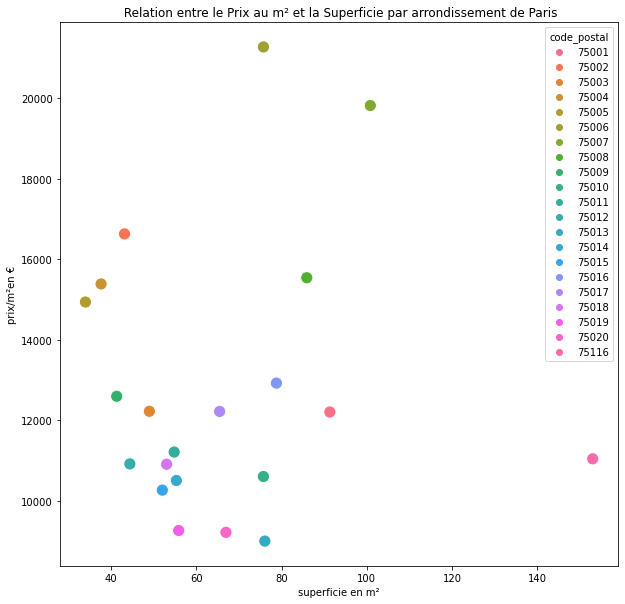

In [53]:
paris_df_g = paris_df.groupby("code_postal").mean()
fig, ax = plt.subplots(figsize=(10,10))

ax = sns.scatterplot(x="taille", y="prix/m²",hue="code_postal", s=150, data=paris_df_g)
ax.set(ylabel = "prix/m²en €" , xlabel = "superficie en m²", title=" Relation entre le Prix au m² et la Superficie par arrondissement de Paris")

plt.savefig("prix_m2_arr_paris.png", dpi=200)

In [54]:
paris_df_g.head()

,nb de pièces,taille,carrez,prix,code_insee,code,prix/m²
code_postal,,,,,,,
75001,2.666667,91.333333,0.0,1.394667e+06,75101.0,75101.0,12208.666667
75002,2.000000,43.166667,0.0,6.609417e+05,75102.0,75102.0,16631.783333
75003,2.250000,49.000000,0.0,6.000000e+05,75103.0,75103.0,12226.550000
75004,2.333333,37.666667,0.0,5.296667e+05,75104.0,75104.0,15388.866667
75005,1.500000,34.000000,0.0,4.981988e+05,75105.0,75105.0,14939.612500
